# Predykcja - regresja i klasyfikacja

Linia:
%matplotlib inline  
pozwala na wyświetlanie wykresów bez użycia plt.show()

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Regresja liniowa
Metoda ta zakłada, że zależność między zmienną objaśnianą a objaśniającą jest liniowa, tzn. próbujemy znaleźć funkcję:

y = a * x + b

najlepiej opisującą punkty ze zbioru, gdzie:

- y - zmienna objaśniana,
- x - zmienna objaśniająca,
- a - współczynnik kierunkowy (ang. *slope*),
- b - wyraz wolny (ang. *intercept*).

Do przykładu regresji wykorzystamy wygenerowane punkty losowo oddalone od prostej o współczynniku kierunkowym a = 2 i wyrazie wolnym b = -3.

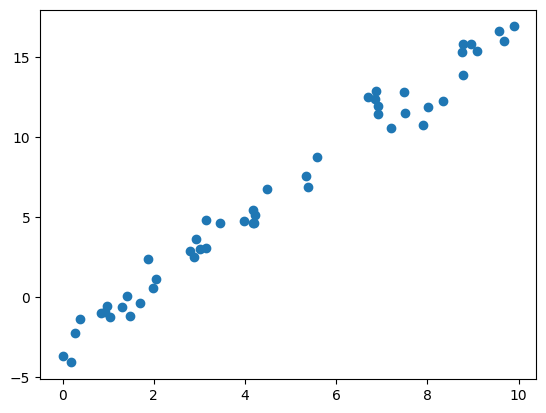

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 3 + rng.randn(50)
plt.scatter(x, y);

Importujemy model dla regresji liniowej z pakietu scikit-learn (sklearn) i tworzymy odpowiedni obiekt. Przy tworzeniu obiektu możemy ustawić wartości dla hiperparametrów modelu. Jednym z takich parametrów jest *fit_intercept*, który oznacza, czy model ma wyznaczyć wartość dla wyrazu wolnego **b**.

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Dane objaśniające powinny mieć wymiar $<$ilość próbek$>$ x $<$ilość wymiarów/cech$>$, dlatego musimy zmienić wymiary dla **x**.

In [4]:
X = x[:, np.newaxis]
X.shape

(50, 1)

Trenujemy model na danych. Możemy też podejrzeć wyznaczone wartości dla parametrów modelu **a** i **b**.

In [5]:
model.fit(X, y)
# a
model.coef_

array([2.02720881])

In [6]:
#b
model.intercept_

-2.9985770855532037

Oraz dokładnbość modelu.

In [7]:
model.score(X, y)

0.9790800609430612

Zastosowanie wyznaczonego modelu regresji liniowej dla "nowych" danych.

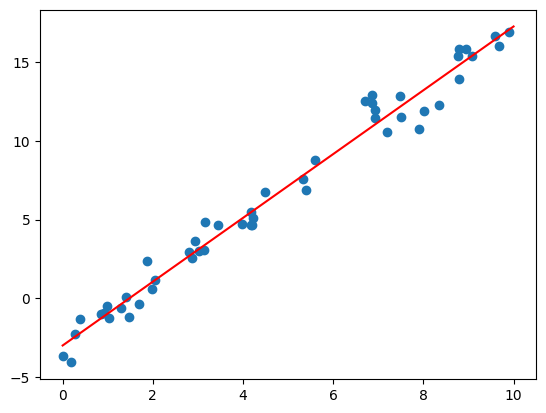

In [8]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Wizualizacja wyników
plt.scatter(x, y)
plt.plot(xfit, yfit,'-r');

### Zadanie 1. (0,5 pkt)
> Korzystając z danych z poprzednich zajęć (dla firmy telekomunikacyjnej) i modelu regresji liniowej, wyznacz dokładną stawkę za minutę połączenia.

In [135]:
# Miejsce na rozwiązanie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("churn.txt")
df.head()

model = LinearRegression(fit_intercept=False)
X = df['Day Mins'].to_numpy()[:, np.newaxis]
y = df['Day Charge'].to_numpy()
model.fit(X, y)
print(model.coef_)
print(model.intercept_)
model.score(X, y)
print(f'Charge per min = {model.coef_} * Day Mins')
# 0.17 za minutę połączenia


[0.17000272]
0.0
Charge per min = [0.17000272] * Day Mins


Szukamy zależności pomiędzy wagą ciała a wagą mózgu dla ssaków w postaci funkcji:

y = a * x,

gdzie *x* oznacza wagę mózgu, zaś *y* wagę ciała.

Wczytujemy odpowiedni plik.

In [137]:
import pandas as pd

df = pd.read_csv('brain_body.csv', index_col='Index')
df.head()

BrainWeight  BodyWeight
Index                         
1            3.385        44.5
2            0.480        15.5
3            1.350         8.1
4          465.000       423.0
5           36.330       119.5

### Zadanie 2. (0,5 pkt)
> Zbadaj, czy istnieje korelacja pomiędzy badanymi zmiennymi.

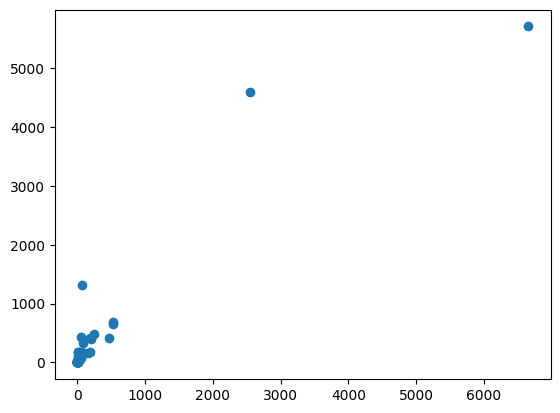

In [138]:
# Miejsce na rozwiązanie
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['BrainWeight'],df['BodyWeight'])
plt.show()

### Zadanie 3. (0,5 pkt)
> Utwórz obiekt modelu regresji liniowej odpowiedni dla zależności z powyższego problemu.
>
> Przygotuj odpowiednio zmienne objaśniającą (nazwij ją *X*) i objaśnianą (nazwij ją *y*).

In [139]:
# Miejsce na rozwiązanie
model = LinearRegression(fit_intercept=True)
X = df['BrainWeight'].to_numpy()[:, np.newaxis]
y = df['BodyWeight'].to_numpy()

Dzielimy zbiór na testowy i uczący.

In [140]:
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.6)
print ('Rozmiar zbioru uczącego = %d i zbiru testowego = %d' % (y1.size, y2.size))

Rozmiar zbioru uczącego = 37 i zbiru testowego = 25


Trenujemy i oceniamy model przy pomocy błędu średniokwadratowego.

In [141]:
from sklearn.metrics import mean_squared_error

model.fit(X1, y1)
y2_model = model.predict(X2)

mean_squared_error(y2, y2_model)

1490805.6876027263

Wizualizacja wyników.

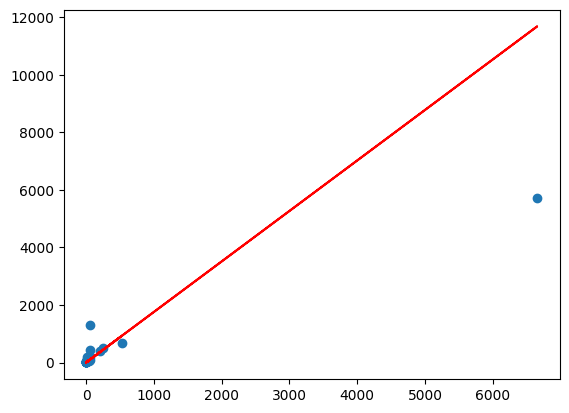

In [142]:
plt.scatter(X2, y2)
plt.plot(X2, y2_model,'-r');

### Zadanie 4. (1,5 pkt)
> Usuń z analizowanego zbioru danych punkty oddalone i powtórz regresję. Porównaj wyniki. Porównaj też dokładność modelu na danych uczących i testowych.

62
62
57
57
Rozmiar zbioru uczącego = 34 i zbioru testowego = 23
69786.77732440714


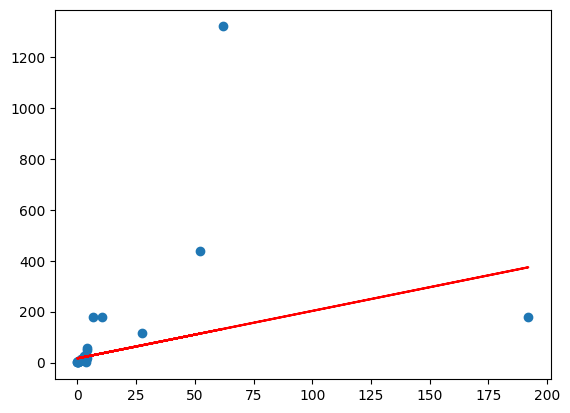

In [143]:
# Miejsce na rozwiązanie
model = LinearRegression(fit_intercept=True)
X = df['BrainWeight'].to_numpy()
y = df['BodyWeight'].to_numpy()

z_threshold = 0.25

z_scores_X = np.abs((X - X.mean()) / X.std())

non_outliers_indices = np.where(z_scores_X < z_threshold)

print(X.size)
print(y.size)

X = X[non_outliers_indices][:, np.newaxis]
y = y[non_outliers_indices][:, np.newaxis]

print(X.size)
print(y.size)

X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.6)
print ('Rozmiar zbioru uczącego = %d i zbioru testowego = %d' % (y1.size, y2.size))

model.fit(X1, y1)
y2_model = model.predict(X2)
print(mean_squared_error(y2, y2_model))

plt.scatter(X2, y2)
plt.plot(X2, y2_model,'-r');


Jeżeli proces składa się z kilku etapów, można wykorzystać klasę *Pipeline*.

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

W poniższym przykładzie zdefiniowano proces składający się z transformacji danych (*PolynomialFeatures*) i regresji liniowej.

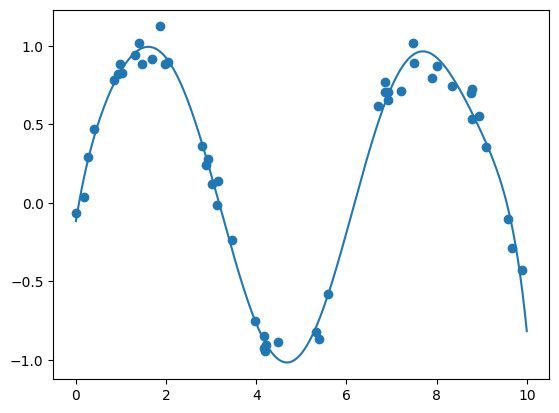

In [147]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(8),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

### Zadanie 5. (0,5 pkt)
> Przetestuj inne wartości (mniejsze i większe od przykładowej) jako argument przy tworzeniu obiektu klasy *PolynomialFeatures*. Co możesz powiedzieć o zachowaniu modelu?

Im większą wartość podamy jako argument, tym bardziej model dopasuje się do danych.

### Zadanie 6. (1,5 pkt)
> Dla powyższych losowych danych przetestuj regresję z regularyzacją $L_2$ oraz z regularyzacją $L_1$. Narysuj wykres i oblicz błędy średniokwadratowy i średni bezwzględny dla trzech modeli. Porównaj wyniki.
>
> **UWAGA:** Obie miary błędu modelu są dostępne w module *sklearn.metrics*.

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [148]:
# Miejsce na rozwiązanie
from sklearn.linear_model import Ridge # L2
from sklearn.linear_model import Lasso # L1
from sklearn.metrics import mean_absolute_error, mean_squared_error

# WITHOUT REGULARIZATION
X1, X2, y1, y2 = train_test_split(x, y, random_state=0,train_size=0.8)
x_train = X1[:, np.newaxis]
x_test = X2[:, np.newaxis]
model = LinearRegression(fit_intercept=False)
model.fit(x_train,y1)
y2_model = model.predict(x_test)
print("LinearRegression:")
print(f'MSE: {mean_squared_error(y2, y2_model)}')
print(f'MAE: {mean_absolute_error(y2, y2_model)}')

# LASSO
X1, X2, y1, y2 = train_test_split(x, y, random_state=0,train_size=0.8)
x_train = X1[:, np.newaxis]
x_test = X2[:, np.newaxis]
model = Lasso(fit_intercept=False)
model.fit(x_train,y1)
y2_model = model.predict(x_test)
print("Lasso:")
print(f'MSE: {mean_squared_error(y2, y2_model)}')
print(f'MAE: {mean_absolute_error(y2, y2_model)}')

# RIDGE
X1, X2, y1, y2 = train_test_split(x, y, random_state=0,train_size=0.8)
x_train = X1[:, np.newaxis]
x_test = X2[:, np.newaxis]
model = Ridge(fit_intercept=False)
model.fit(x_train,y1)
y2_model = model.predict(x_test)
print("Ridge:")
print(f'MSE: {mean_squared_error(y2, y2_model)}')
print(f'MAE: {mean_absolute_error(y2, y2_model)}')

LinearRegression:
MSE: 0.4727384765189041
MAE: 0.5706560488178869
Lasso:
MSE: 0.49500846155774186
MAE: 0.5892864509133677
Ridge:
MSE: 0.4727480615305747
MAE: 0.570674227186581


Poniżej przedstwiono przykład tworzenia regresji liniowej jako funkcji dwóch zmiennych.

In [108]:
df = pd.read_csv("boston_data.csv")
df.head()

Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO       B  LSTAT  MEDV  
0  296.0     15.3  396.90   4.98  24.0  
1  242.0     17.8  396.90   9.14  21.6  
2  242.0     17.8  392.83   4.03  34.7  
3  222.0     18.7  394.63   2.94  33.4  
4  222.0     18.7  396.90   5.33  36.2

In [109]:
X = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])

In [110]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.8)

In [111]:
x_train = X1[['RM', 'LSTAT']].values.reshape(-1,2)
x_test = X2[['RM', 'LSTAT']].values.reshape(-1,2)
model = LinearRegression(fit_intercept=False)
model.fit(x_train,y1)
y2_model = model.predict(x_test)
mean_squared_error(y2, y2_model)

37.39966159556811

## Metoda wektorów nośnych (ang. *Support Vector Machine*)

In [122]:
from sklearn import svm

Tworzymy przykładowe dane.

In [123]:
X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])
y = [0,1,0,1,0,1]

Tworzymy i uczymy model.

In [124]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X, y)

SVC(kernel='linear')

In [125]:
clf.score(X,y)

1.0

Klasyfikacja kolejnego punktu.

In [126]:
clf.predict([[0.58,0.76]])

array([0])

In [127]:
clf.predict([[10.58,10.76]])

array([1])

[0.1380943  0.24462418]


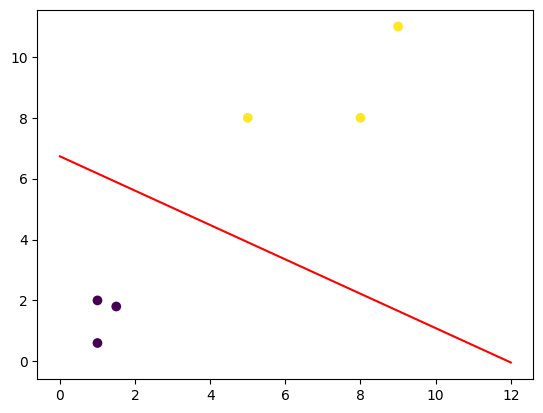

In [128]:
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, '-r')
plt.scatter(X[:, 0], X[:, 1], c = y)

Pobranie wektorów nośnych.

In [129]:
clf.support_vectors_

array([[1.5, 1.8],
       [5. , 8. ]])

Pobranie indeksów wektorów.

In [130]:
clf.support_

array([2, 1], dtype=int32)

Pobranie liczby wektorów nośnych dla każdej z klas.

In [131]:
clf.n_support_

array([1, 1], dtype=int32)

### Zadanie 8. (2 pkt)
> Wykonaj klasyfikację z wykorzystaniem metody SVM na zbiorze danych *iris*. Podziel dane na uczące i testowe w stosunku 4:1. Przetestuj różne wartości dla parametru *kernel* ('linear','rbf','poly','sigmoid') oraz *gamma* (0, 10, 100) dla *kernel*='rbf'. Porównaj dokładność na zbiorach uczącym i testowym dla różnych parametrów modelu. Zbadaj też wartości miary *f1* dla wyników predykcji testowanych modeli.
>
> **UWAGA:** Miara *f1* jest dostępna w module *sklearn.metrics*.

Importujemy zbiór danych *iris*.

In [150]:
from sklearn import svm
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [176]:
# Miejsce na rozwiązanie
from sklearn.metrics import f1_score

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,train_size=0.8)
print ('Rozmiar zbioru uczącego = %d i zbioru testowego = %d' % (y1.size, y2.size))

# Linear kernel
clf = svm.SVC(kernel = 'linear')
clf.fit(X1,y1)
y_pred = clf.predict(X2)
f1 = f1_score(y2, y_pred, average='weighted')
print("Linear Kernel")
print(f'Train accuracy: {clf.score(X1,y1)}')
print(f'Test accuracy: {clf.score(X2,y2)}')
print(f'F1 Score: {f1}\n')

# Polynomial kernel
clf = svm.SVC(kernel = 'poly', degree=7)
clf.fit(X1,y1)
y_pred = clf.predict(X2)
f1 = f1_score(y2, y_pred, average='weighted')
print("Polynomial Kernel")
print(f'Train accuracy: {clf.score(X1,y1)}')
print(f'Test accuracy: {clf.score(X2,y2)}')
print(f'F1 Score: {f1}\n')

# Sigmoid kernel
clf = svm.SVC(kernel = 'sigmoid')
clf.fit(X1,y1)
y_pred = clf.predict(X2)
f1 = f1_score(y2, y_pred, average='weighted')
print("Sigmoid Kernel")
print(f'Train accuracy: {clf.score(X1,y1)}')
print(f'Test accuracy: {clf.score(X2,y2)}')
print(f'F1 Score: {f1}\n')

# RBF kernel
clf = svm.SVC(kernel = 'rbf')
clf.fit(X1,y1)
y_pred = clf.predict(X2)
f1 = f1_score(y2, y_pred, average='weighted')
print("RBF Kernel")
print(f'Train accuracy: {clf.score(X1,y1)}')
print(f'Test accuracy: {clf.score(X2,y2)}')
print(f'F1 Score: {f1}\n')

# RBF kernel gamma = 0
clf = svm.SVC(kernel = 'rbf', gamma = 0)
clf.fit(X1,y1)
y_pred = clf.predict(X2)
f1 = f1_score(y2, y_pred, average='weighted')
print("RBF kernel gamma = 0")
print(f'Train accuracy: {clf.score(X1,y1)}')
print(f'Test accuracy: {clf.score(X2,y2)}')
print(f'F1 Score: {f1}\n')

# RBF kernel gamma = 10
clf = svm.SVC(kernel = 'rbf', gamma = 10)
clf.fit(X1,y1)
y_pred = clf.predict(X2)
f1 = f1_score(y2, y_pred, average='weighted')
print("RBF kernel gamma = 10")
print(f'Train accuracy: {clf.score(X1,y1)}')
print(f'Test accuracy: {clf.score(X2,y2)}')
print(f'F1 Score: {f1}\n')

# RBF kernel gamma = 100
clf = svm.SVC(kernel = 'rbf', gamma = 100)
clf.fit(X1,y1)
y_pred = clf.predict(X2)
f1 = f1_score(y2, y_pred, average='weighted')
print("RBF kernel gamma = 100")
print(f'Train accuracy: {clf.score(X1,y1)}')
print(f'Test accuracy: {clf.score(X2,y2)}')
print(f'F1 Score: {f1}\n')

Rozmiar zbioru uczącego = 120 i zbioru testowego = 30
Linear Kernel
Train accuracy: 0.8416666666666667
Test accuracy: 0.7333333333333333
F1 Score: 0.7412698412698414

Polynomial Kernel
Train accuracy: 0.8333333333333334
Test accuracy: 0.6333333333333333
F1 Score: 0.6333333333333333

Sigmoid Kernel
Train accuracy: 0.36666666666666664
Test accuracy: 0.2
F1 Score: 0.06666666666666667

RBF Kernel
Train accuracy: 0.85
Test accuracy: 0.7333333333333333
F1 Score: 0.7412698412698414

RBF kernel gamma = 0
Train accuracy: 0.36666666666666664
Test accuracy: 0.2
F1 Score: 0.06666666666666667

RBF kernel gamma = 10
Train accuracy: 0.8666666666666667
Test accuracy: 0.6
F1 Score: 0.6066666666666667

RBF kernel gamma = 100
Train accuracy: 0.925
Test accuracy: 0.4666666666666667
F1 Score: 0.4808417508417509



Jeżeli chodzi o różne jądra SVM, najlepsze dla zbioru danych iris okazało się jądro rbf. Współczynnik gamma = 10, dał największą dokładność przy wykorzystaniu jądra rbf.
Wniosek: Współczynnik gamma nie może być ani za mały ani za duży.